<h1 style="color: #37709F">Estimating the price of a stock</h1>

- **What do we do:**
    - use Facebook's Prophet library to perform predictive analytics
    - use the Yahoo Finance bible to search for stock data
    
- **Project:**

    - Predict the future value of a stock.

<h2 style="color: #37709F">Installing and loading libraries</h2>

In [2]:
!pip install yfinance prophet

     ---------------------------------------- 12.9/12.9 MB 4.4 MB/s eta 0:00:00
     ---------------------------------------- 47.9/47.9 kB 2.4 MB/s eta 0:00:00
     -------------------------------------- 541.3/541.3 kB 5.6 MB/s eta 0:00:00
     ---------------------------------------- 83.2/83.2 kB 4.6 MB/s eta 0:00:00
     ---------------------------------------- 5.8/5.8 MB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 1.4/1.4 MB 5.4 MB/s eta 0:00:00
  Created wheel for pymeeus: filename=PyMeeus-0.5.12-py3-none-any.whl size=732051 sha256=0c1047c9daf2527082c2bb437a6677f81faeacca25e3672505a7c43333ddf79f
  Stored in directory: c:\users\asus caio\appdata\local\pip\cache\wheels\74\47\c4\678b0a3d5213e2f8500f3ea0f8dc3c81478e5b806c557dff58
Successfully built pymeeus


In [3]:
import yfinance as yf
from prophet import Prophet
from prophet.plot import plot_plotly

<h2 style="color: #37709F">Loading historical data</h2>

In [16]:
ticker = input("Enter the desired action code: ")
data = yf.Ticker(ticker).history("2y")

Enter the desired action code: ANIM3.SA


<h2 style="color: #37709F">Historical period variation chart</h2>

<Axes: xlabel='Date'>

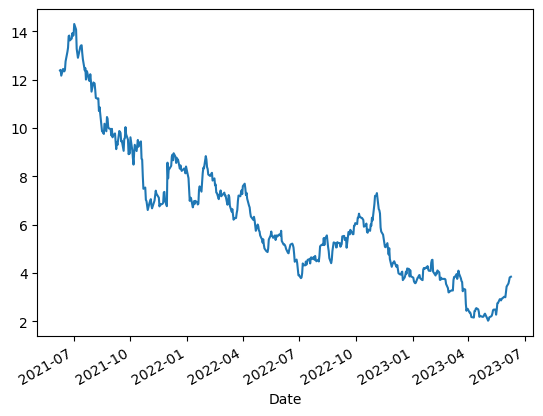

In [17]:
data.Close.plot()

<h2 style="color: #37709F">Preparing the training data</h2>

In [18]:
# resetting the DataFrame index
training = data.reset_index()

In [19]:
# removing the timezone from the date column
training["Date"] = training["Date"].dt.tz_localize(None)

In [20]:
# selecting the date and closing value columns
training = training[['Date', 'Close']]

In [21]:
# renaming the columns (Prophet needs to receive data with this pattern)
training.columns = ['ds', 'y']

<h2 style="color: #37709F">Training our model</h2>

In [22]:
# creating the model
model = Prophet()

# training the model with the training data
model.fit(training)

# specifying the forecast period (in days)
period = model.make_future_dataframe(periods=90)

# generating the predictions
predictions = model.predict(period)

16:05:50 - cmdstanpy - INFO - Chain [1] start processing
16:05:50 - cmdstanpy - INFO - Chain [1] done processing


<h2 style="color: #37709F">Generating the prediction chart</h2>

In [23]:
plot_plotly(model, predictions, xlabel = "period", ylabel="value")